# Data Understanding

In [25]:
import pandas as pd

# Load dataset
df_iris = pd.read_csv('iris.csv')

# Menampilkan 10 baris pertama dan 20 baris terakhir
print("10 Baris Pertama:")
print(df_iris.head(10))
print("\n10 Baris Terakhir:")
print(df_iris.tail(10))

# Menampilkan jumlah baris dan kolom
print("\nJumlah Baris dan Kolom:", df_iris.shape)
print("\nJumlah Baris:", df_iris.shape[0])
print("Jumlah Kolom:", df_iris.shape[1])

# Menampilkan tipe data setiap kolom
print("\nTipe Data:")
print(df_iris.dtypes)

# Menampilkan deskripsi statistik untuk semua kolom
print("\nDeskripsi Statistik:")
print(df_iris.describe(include='all'))

10 Baris Pertama:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa

10 Baris Terakhir:
     sepal_length  sepal_width  petal_length  petal_width    species
140           6.7          3.1           5.6          2.4  virginica
141           6.9          3.1           5.1          2.3  virginica
142           5.8          2.7           5.1       

In [26]:
print("\nJumlah Data Yang Null:")
print(df_iris.isnull().sum())

# Deteksi outlier menggunakan IQR method
q1 = df_iris.select_dtypes(exclude=['object']).quantile(0.25)
q3 = df_iris.select_dtypes(exclude=['object']).quantile(0.75)
iqr = q3 - q1

batas_bawah = q1 - (1.5 * iqr)
batas_atas = q3 + (1.5 * iqr)

# Filter outlier
df_ex_object = df_iris.select_dtypes(exclude=['object'])
outlier_filter = ((df_ex_object < batas_bawah) | (df_ex_object > batas_atas))

# Menampilkan jumlah outlier di setiap kolom
for col in outlier_filter.columns:
    print(f'\nNama Kolom: {col}')
    print(outlier_filter[col].value_counts())
    print('-------------------')


Jumlah Data Yang Null:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Nama Kolom: sepal_length
sepal_length
False    150
Name: count, dtype: int64
-------------------

Nama Kolom: sepal_width
sepal_width
False    146
True       4
Name: count, dtype: int64
-------------------

Nama Kolom: petal_length
petal_length
False    150
Name: count, dtype: int64
-------------------

Nama Kolom: petal_width
petal_width
False    150
Name: count, dtype: int64
-------------------


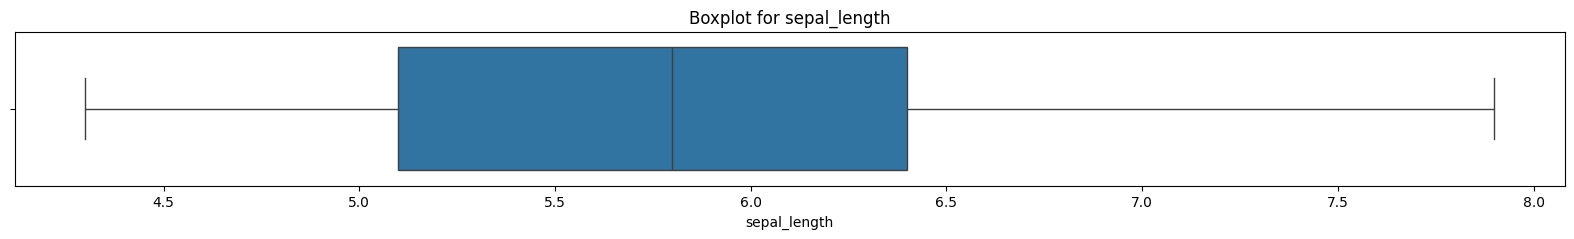

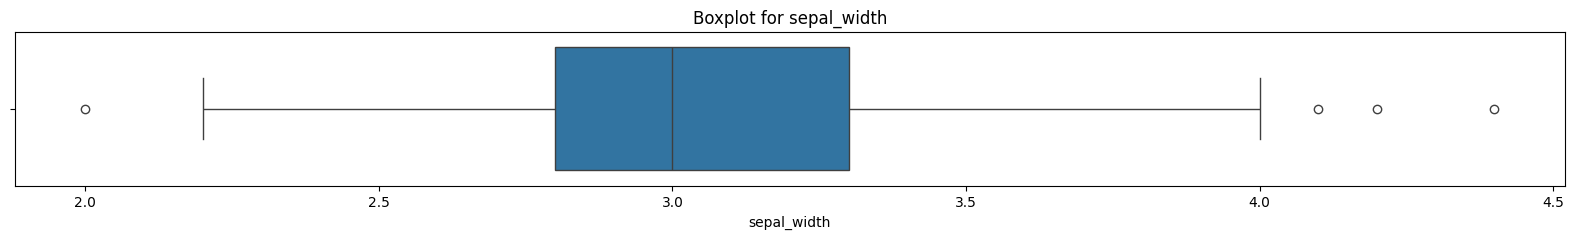

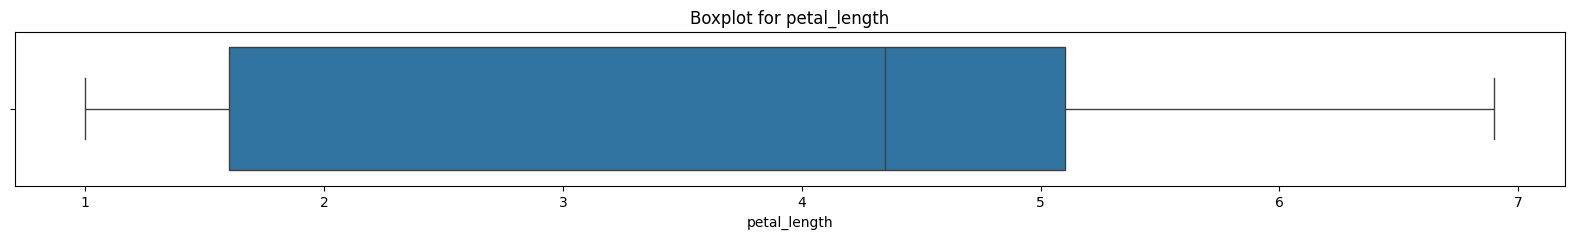

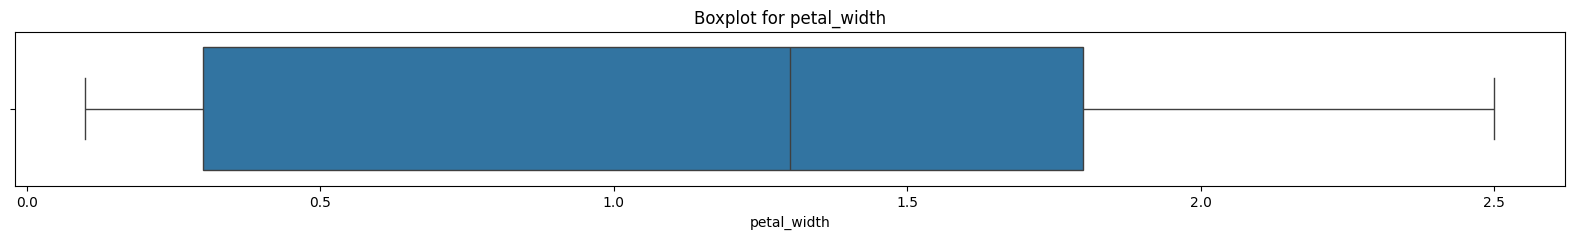

In [27]:
# Visualisasi boxplot untuk mendeteksi outlier
import matplotlib.pyplot as plt
import seaborn as sns

df_outlier = df_iris.select_dtypes(exclude=['object'])
for column in df_outlier:
    plt.figure(figsize=(20, 2))
    sns.boxplot(data=df_outlier, x=column)
    plt.title(f"Boxplot for {column}")
    plt.show()

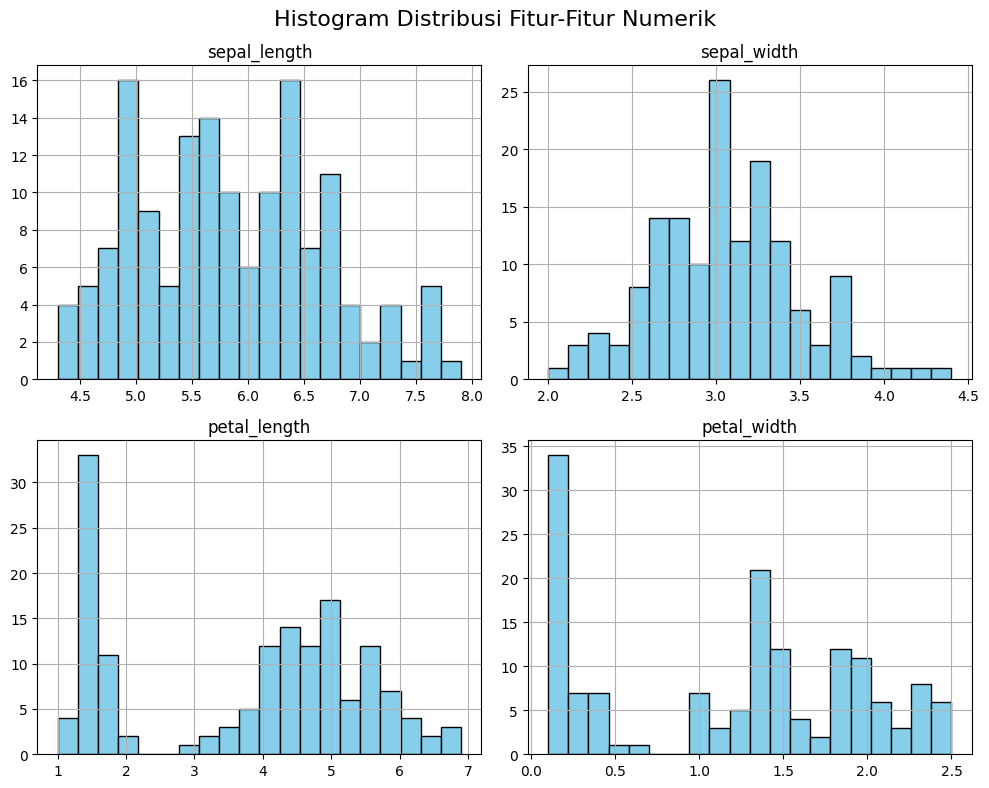

In [28]:
df_iris.hist(bins=20, figsize=(10, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histogram Distribusi Fitur-Fitur Numerik', size=16)
plt.tight_layout()
plt.show()

In [29]:
corr=df_iris.corr(numeric_only=True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


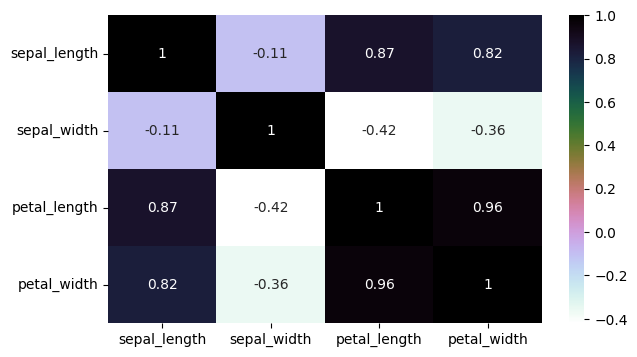

In [30]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df_iris.corr(numeric_only=True),annot=True,cmap='cubehelix_r') 
plt.show()

Silhouette Coefficient (average): 0.5509643746707443


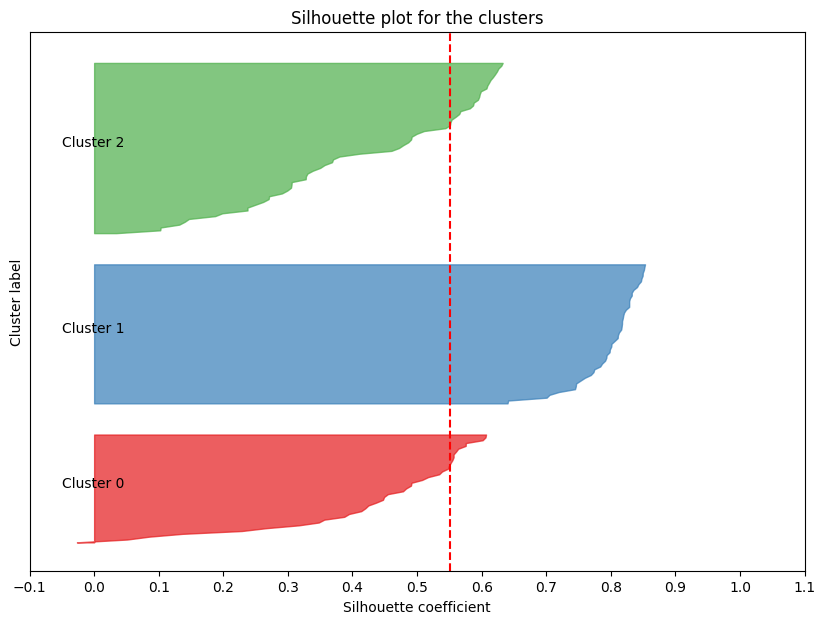

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

# Load dataset Iris
df_iris_coeff = pd.read_csv('iris.csv')

# Mengambil fitur numerik untuk klasterisasi
X = df_iris_coeff.select_dtypes(exclude=['object'])

# ----- 1. K-Means Clustering -----
n_clusters = 3  # Sesuai dengan jumlah spesies pada dataset Iris
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# ----- 2. Menghitung Silhouette Score -----
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Coefficient (average): {silhouette_avg}")

# ----- 3. Menghitung Silhouette Score per Sample -----
sample_silhouette_values = silhouette_samples(X, cluster_labels)

# ----- 4. Visualisasi Silhouette -----
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10, 7)

# Range untuk sumbu-y
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

y_lower = 10
for i in range(n_clusters):
    # Mengambil nilai silhouette untuk setiap klaster
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    
    # Urutkan nilai-nilai silhouette
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = sns.color_palette("Set1")[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label untuk setiap klaster
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, f"Cluster {i}")

    y_lower = y_upper + 10  # 10 untuk jarak antar klaster

ax1.set_title("Silhouette plot for the clusters")
ax1.set_xlabel("Silhouette coefficient")
ax1.set_ylabel("Cluster label")

# Garis vertikal untuk average silhouette score
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Tidak menampilkan sumbu y
ax1.set_xticks(np.arange(-0.1, 1.1, 0.1))

plt.show()

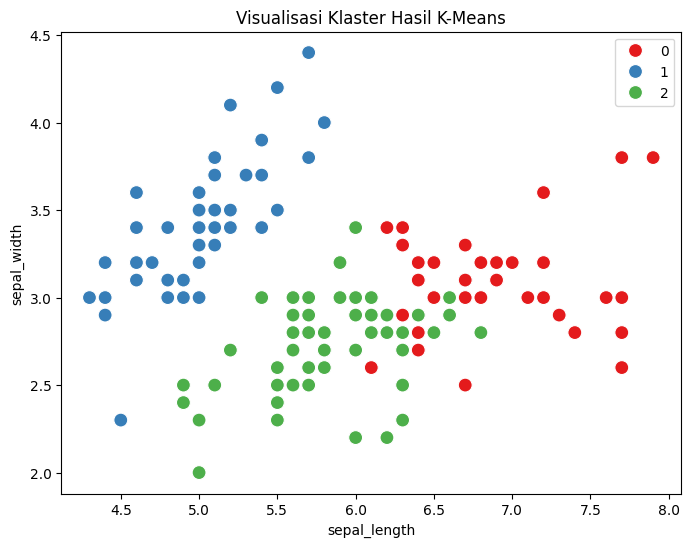

In [32]:
# ----- 5. Visualisasi Klaster Hasil K-Means -----
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue=cluster_labels, palette="Set1", data=df_iris, s=100)
plt.title("Visualisasi Klaster Hasil K-Means")
plt.show()

# Modelling dan Evaluasi

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report

In [34]:
# Load dataset
df_iris = pd.read_csv('iris.csv')

Mean Squared Error (Linear Regression): 0.1091900957932912


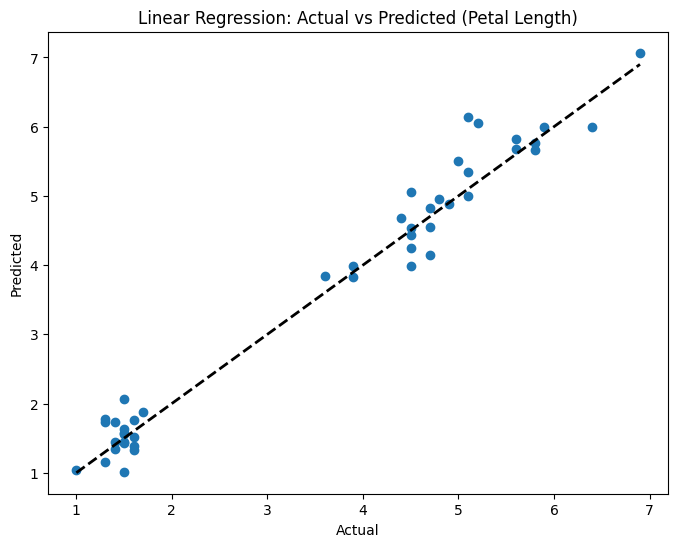

In [35]:
# ----- LINEAR REGRESSION -----
# Memisahkan fitur dan target
X_lr = df_iris[['sepal_length', 'sepal_width', 'petal_width']]
y_lr = df_iris['petal_length']

# Membagi dataset menjadi training dan testing
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.3, random_state=42)

# Membuat model Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)

# Prediksi
y_pred_lr = lr_model.predict(X_test_lr)

# Evaluasi menggunakan MSE (Mean Squared Error)
mse_lr = mean_squared_error(y_test_lr, y_pred_lr)
print(f"Mean Squared Error (Linear Regression): {mse_lr}")

# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(8,6))
plt.scatter(y_test_lr, y_pred_lr)
plt.plot([y_test_lr.min(), y_test_lr.max()], [y_test_lr.min(), y_test_lr.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted (Petal Length)')
plt.show()

Accuracy (Logistic Regression): 1.0

Confusion Matrix (Logistic Regression):
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


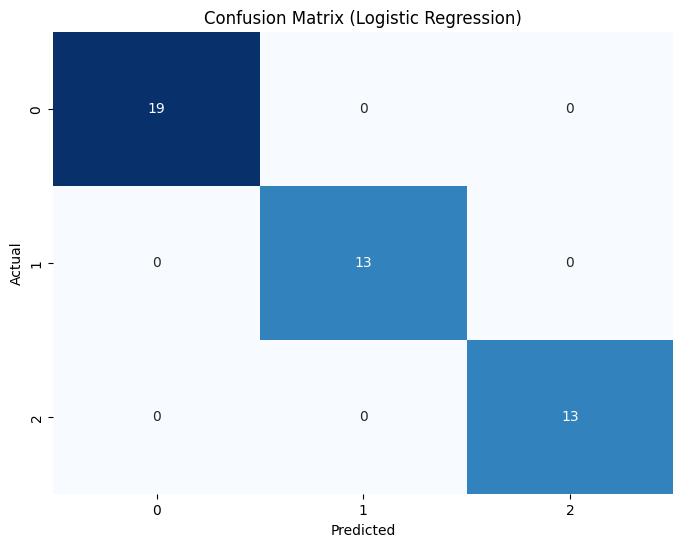

In [36]:
# ----- LOGISTIC REGRESSION -----
# Memisahkan fitur dan target
X_logr = df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_logr = df_iris['species']

# Membagi dataset menjadi training dan testing
X_train_logr, X_test_logr, y_train_logr, y_test_logr = train_test_split(X_logr, y_logr, test_size=0.3, random_state=42)

# Membuat model Logistic Regression
logr_model = LogisticRegression(max_iter=200)
logr_model.fit(X_train_logr, y_train_logr)

# Prediksi
y_pred_logr = logr_model.predict(X_test_logr)

# Evaluasi menggunakan accuracy score
accuracy_logr = accuracy_score(y_test_logr, y_pred_logr)
print(f"Accuracy (Logistic Regression): {accuracy_logr}")

# Confusion Matrix
conf_matrix_logr = confusion_matrix(y_test_logr, y_pred_logr)
print("\nConfusion Matrix (Logistic Regression):")
print(conf_matrix_logr)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_logr, annot=True, cmap="Blues", fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

Accuracy (KNN): 1.0

Confusion Matrix (KNN):
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


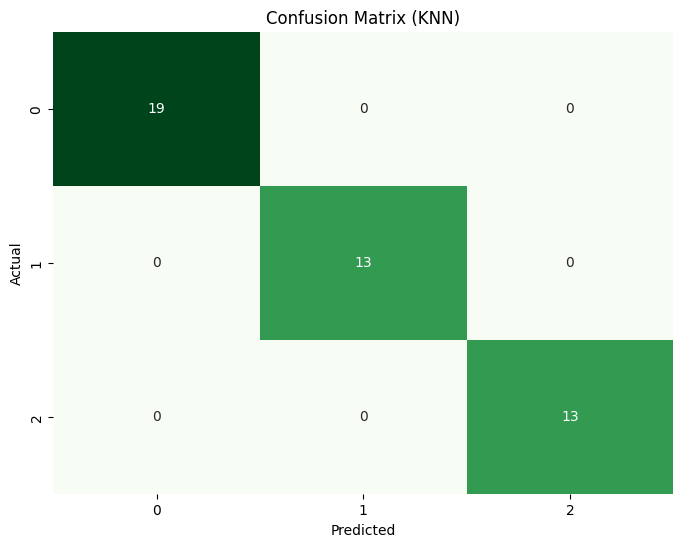

In [37]:
# ----- K-NEAREST NEIGHBORS (KNN) -----
# Memisahkan fitur dan target
X_knn = df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_knn = df_iris['species']

# Membagi dataset menjadi training dan testing
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.3, random_state=42)

# Membuat model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_knn, y_train_knn)

# Prediksi
y_pred_knn = knn_model.predict(X_test_knn)

# Evaluasi menggunakan accuracy score
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn}")

# Confusion Matrix untuk KNN
conf_matrix_knn = confusion_matrix(y_test_knn, y_pred_knn)
print("\nConfusion Matrix (KNN):")
print(conf_matrix_knn)

# Visualisasi Confusion Matrix untuk KNN
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_knn, annot=True, cmap="Greens", fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN)')
plt.show()
